In [1]:
'''
Investigating basic charachteristics of the NSHM2010
'''

'\nInvestigating basic charachteristics of the NSHM2010\n'

# Import the dependencies

In [2]:
import os

import numpy as np
import pandas as pd
import qcore.nhm as nhm

import matplotlib.pyplot as plt

# Path and directory works

In [3]:
root_path = os.getcwd()

base_dir = "/mnt/hypo_data/mab419/mab419_cybershake_investigation/base_data"  # dpath to dirctory of base data

# File names of the stations data
stations_ll = "non_uniform_whole_nz_with_real_stations-hh400_v20p3_land.ll"
stations_vs30 = "non_uniform_whole_nz_with_real_stations-hh400_v20p3_land.vs30"
stations_z = "non_uniform_whole_nz_with_real_stations-hh400_v20p3_land.z"
nz_flt_erf = "NZ_FLTmodel_2010.txt" # NSHM 2010 Fault ERF model
site_source_db = "new_flt_site_source.db"  # 'Fault-Site-Source' database

fault_erf_ffp = os.path.join(base_dir, nz_flt_erf)

# Plot Major Setting

In [4]:
plt.rcParams.update(
    {
        "font.size": 8,  # General font size
        "font.family": "serif",  # Font family (e.g., serif, sans-serif, monospace)
        "axes.titlesize": 10,  # Title font size
        "axes.labelsize": 8,  # Axis label font size
        "xtick.labelsize": 6,  # X-axis tick font size
        "ytick.labelsize": 6,  # Y-axis tick font size
        "legend.fontsize": 6,  # Legend font size
    }
)

# Load Fault ERF Data

In [5]:
flt_erf_df = nhm.load_nhm_df(str(fault_erf_ffp))

# Investigate Fault ERFF

## Number of Faults

In [6]:
print(f'Total number of Faults: {len(flt_erf_df)}')


Total number of Faults: 536


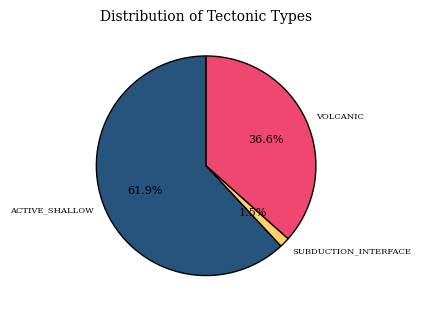

,tectonic_type,Count
0,ACTIVE_SHALLOW,332
1,SUBDUCTION_INTERFACE,8
2,VOLCANIC,196


In [7]:
pivot_df = flt_erf_df.pivot_table(
    index="tectonic_type", aggfunc="size", margins=False
).reset_index(name="Count")


fig, ax = plt.subplots(figsize=(10 / 2.54, 9 / 2.54))
colors = [
    "#26547c",
    "#ffd166",
    "#ef476f",
]
ax.pie(
    pivot_df["Count"],
    labels=pivot_df["tectonic_type"],
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops={"edgecolor": "black"},
)
ax.set_title("Distribution of Tectonic Types")
plt.tight_layout()
plt.show()

pivot_df

## Depth

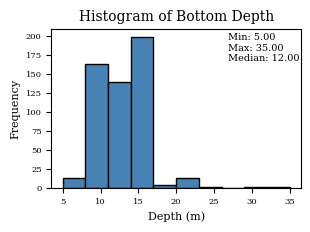

In [8]:
fig, ax =plt.subplots(figsize=(8/2.54, 6/2.54))
ax.hist(flt_erf_df["dbottom"], bins=10, color="steelblue", edgecolor="black")
ax.set_title('Histogram of Bottom Depth')
ax.set_xlabel('Depth (m)')
ax.set_ylabel('Frequency')
fig.text(
    0.73,
    0.85,
    f"Min: {flt_erf_df['dbottom'].min():.2f} \nMax: {flt_erf_df['dbottom'].max():.2f} \nMedian: {flt_erf_df['dbottom'].median():.2f}",
    ha="left",
    va="top",
    fontsize=7,
    wrap=True,
)
plt.tight_layout()
plt.show()

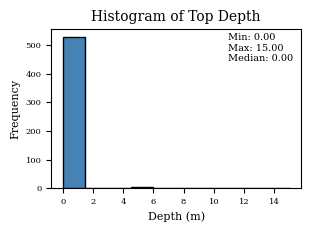

In [9]:
fig, ax = plt.subplots(figsize=(8 / 2.54, 6 / 2.54))
ax.hist(flt_erf_df["dtop"], bins=10, color="steelblue", edgecolor="black")
ax.set_title("Histogram of Top Depth")
ax.set_xlabel("Depth (m)")
ax.set_ylabel("Frequency")
fig.text(
    0.73,
    0.85,
    f"Min: {flt_erf_df['dtop'].min():.2f} \nMax: {flt_erf_df['dtop'].max():.2f} \nMedian: {flt_erf_df['dtop'].median():.2f}",
    ha="left",
    va="top",
    fontsize=7,
    wrap=True,
)
plt.tight_layout()
plt.show()

## Length

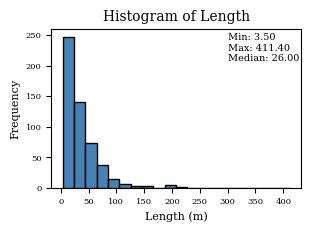

In [10]:
fig, ax = plt.subplots(figsize=(8 / 2.54, 6 / 2.54))
ax.hist(flt_erf_df["length"], bins=20, color="steelblue", edgecolor="black")
ax.set_title("Histogram of Length")
ax.set_xlabel("Length (m)")
ax.set_ylabel("Frequency")
fig.text(
    0.73,
    0.85,
    f"Min: {flt_erf_df['length'].min():.2f} \nMax: {flt_erf_df['length'].max():.2f} \nMedian: {flt_erf_df['length'].median():.2f}",
    ha="left",
    va="top",
    fontsize=7,
    wrap=True,
)
plt.tight_layout()
plt.show()

## Magnitude

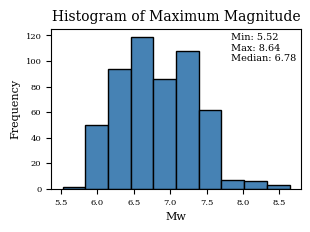

In [11]:
fig, ax = plt.subplots(figsize=(8 / 2.54, 6 / 2.54))
ax.hist(flt_erf_df["mw"], bins=10, color="steelblue", edgecolor="black")
ax.set_title("Histogram of Maximum Magnitude")
ax.set_xlabel("Mw")
ax.set_ylabel("Frequency")
fig.text(
    0.74,
    0.85,
    f"Min: {flt_erf_df['mw'].min():.2f} \nMax: {flt_erf_df['mw'].max():.2f} \nMedian: {flt_erf_df['mw'].median():.2f}",
    ha="left",
    va="top",
    fontsize=7,
    wrap=True,
)
plt.tight_layout()
plt.show()

## Recurrence Interval

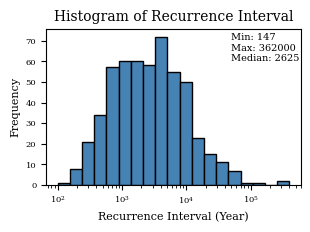

In [12]:
fig, ax = plt.subplots(figsize=(8 / 2.54, 6 / 2.54))
bins = np.logspace(np.log10(100), np.log10(400000), 20)
ax.hist(flt_erf_df["recur_int_median"], bins=bins, color="steelblue", edgecolor="black")
ax.set_xscale("log")
ax.set_title("Histogram of Recurrence Interval")
ax.set_xlabel("Recurrence Interval (Year)")
ax.set_ylabel("Frequency")
fig.text(
    0.74,
    0.85,
    f"Min: {flt_erf_df['recur_int_median'].min():.0f} \nMax: {flt_erf_df['recur_int_median'].max():.0f} \nMedian: {flt_erf_df['recur_int_median'].median():.0f}",
    ha="left",
    va="top",
    fontsize=7,
    wrap=True,
)
plt.tight_layout()
plt.show()

## Exceedance Rate

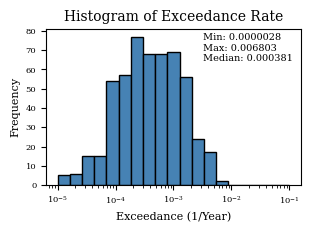

In [50]:
fig, ax = plt.subplots(figsize=(8 / 2.54, 6 / 2.54))
bins = np.logspace(np.log10(0.00001), np.log10(0.1), 20)
ax.hist(flt_erf_df["exceedance"], bins=bins, color="steelblue", edgecolor="black")
ax.set_xscale("log")
ax.set_title("Histogram of Exceedance Rate")
ax.set_xlabel("Exceedance (1/Year)")
ax.set_ylabel("Frequency")
fig.text(
    0.65,
    0.85,
    f"Min: {flt_erf_df['exceedance'].min():.7f} \nMax: {flt_erf_df['exceedance'].max():.6f} \nMedian: {flt_erf_df['exceedance'].median():.6f}",
    ha="left",
    va="top",
    fontsize=7,
    wrap=True,
)
plt.tight_layout()
plt.show()

In [13]:
flt_erf_df

,name,tectonic_type,length,length_sigma,dip,dip_sigma,dip_dir,rake,dbottom,dbottom_sigma,dtop,dtop_min,dtop_max,slip_rate,slip_rate_sigma,coupling_coeff,coupling_coeff_sigma,mw,recur_int_median,exceedance
AhuririR,AhuririR,ACTIVE_SHALLOW,44.000,6.600,45.0,5.0,280.0,90.0,12.0,1.0,0.0,0.0,1.0,0.500,0.100,1.0,0.0,7.19,6130.0,0.000163
AkaOtaki,AkaOtaki,ACTIVE_SHALLOW,68.000,10.200,75.0,5.0,145.0,45.0,20.0,1.0,0.0,0.0,1.0,0.700,0.140,1.0,0.0,7.50,6770.0,0.000148
Akatore,Akatore,ACTIVE_SHALLOW,65.000,9.750,45.0,5.0,120.0,90.0,12.0,1.0,0.0,0.0,1.0,1.300,0.260,1.0,0.0,7.42,3480.0,0.000287
Albury,Albury,ACTIVE_SHALLOW,20.000,3.000,60.0,5.0,245.0,90.0,12.0,1.0,0.0,0.0,1.0,0.130,0.026,1.0,0.0,6.68,10700.0,0.000093
AldermanE01,AldermanE01,VOLCANIC,9.719,1.458,50.0,5.0,290.0,-90.0,12.0,1.0,0.0,0.0,1.0,0.199,0.040,1.0,0.0,6.11,1830.0,0.000546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WhiteIsN01,WhiteIsN01,VOLCANIC,19.772,2.966,50.0,5.0,300.0,-90.0,8.0,1.0,0.0,0.0,1.0,0.124,0.025,1.0,0.0,6.52,8880.0,0.000113
WhiteIsn02,WhiteIsn02,VOLCANIC,9.571,1.436,50.0,5.0,340.0,-90.0,8.0,1.0,0.0,0.0,1.0,0.124,0.025,1.0,0.0,6.10,4320.0,0.000231
Whitemans,Whitemans,ACTIVE_SHALLOW,28.000,4.200,60.0,5.0,300.0,90.0,20.0,1.0,0.0,0.0,1.0,0.100,0.020,1.0,0.0,7.02,19500.0,0.000051
Wkm-1,Wkm-1,ACTIVE_SHALLOW,15.000,2.250,70.0,5.0,300.0,-45.0,15.0,1.0,0.0,0.0,1.0,2.300,0.460,1.0,0.0,6.55,454.0,0.002203


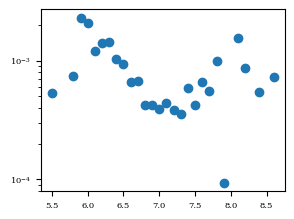

In [35]:
temp_df = flt_erf_df[["name", "mw", "exceedance"]].copy()
temp_df["mw_bin"] = temp_df["mw"].round(1)
temp_df2 = temp_df.groupby("mw_bin")["exceedance"].mean().reset_index()

fig, ax = plt.subplots(figsize=(8 / 2.54, 6 / 2.54))
ax.scatter(temp_df2["mw_bin"], temp_df2["exceedance"])
ax.set_yscale('log')